In [307]:
import warnings 
import utils as ut 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from haversine import haversine
from collections import Counter

warnings.filterwarnings(action='ignore') 

In [2]:
business = pd.read_json('./data/yelp_academic_dataset_business.json', lines=True)
checkin = pd.read_json('./data/yelp_academic_dataset_checkin.json', lines=True)

### Q1. 2019년 온타리오 주(state = ON)에서 별점이 3.0 이상인 레스토랑 중 체크인이 가장 많은 top 10의 레스토랑명을 내림차순으로 나열하세요.

### Answer
온타리오 주에서 별점이 3.0 이상인 레스토랑은 없습니다.

레스토랑이 아닌 Bernie Hipos Wedding Films라는 Event Planning & Service 가게가 있으나, 해당 가게의 체크인 결과가 없습니다.

따라서 해당 문제의 결과를 출력할 수 없습니다.

In [170]:
state_on = business.query("state == 'ON' and stars >= 3")[['business_id', 'name', 'state', 'stars', 'categories']]
state_on

,business_id,name,state,stars,categories
52167,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,ON,5.0,"Event Planning & Services, Videographers, Prof..."


In [171]:
state_on.merge(checkin, how='left')

,business_id,name,state,stars,categories,date
0,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,ON,5.0,"Event Planning & Services, Videographers, Prof...",NaN


Q1의 결과를 얻기 위한 함수를 작성합니다.

In [318]:
def get_year(df, year):
    return df.date.count(year)

def q1_fn(year, state, stars, category, top_n=10):
    filter_category = business[business['categories'].str.contains(f'{category}', na=False, case=False)]
    filter_business = filter_category.query(f"state == '{state}' and stars >= {stars}")[['business_id', 'name', 'state', 'city', 'stars', 'categories']]

    year_count = checkin.apply(get_year, year=f'{year}', axis=1)

    checkin_year = pd.concat([checkin['business_id'], year_count], axis=1).rename(columns={0: 'checkin'})

    business_checkin = filter_business.merge(checkin_year)
    output = business_checkin.sort_values(['checkin', 'stars'], ascending=False, ignore_index=True).head(top_n)

    return output

타 지역(state=MA)의 경우 아래와 같은 결과를 갖고 올 수 있습니다.

In [174]:
year = 2019
state = 'MA'
stars = 3 
category = 'Restaurants'

q1_fn(year, state, stars, category)

,business_id,name,state,stars,categories,checkin
0,aVCqrBqMqZaapyVrVNnZJQ,Beard Papa's,MA,4.0,"Restaurants, Japanese, Bakeries, Food, Desserts",1127
1,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry,MA,4.0,"Candy Stores, Gelato, Food, Coffee & Tea, Rest...",951
2,xlOMKjE4omTgkI1eduWj8A,The Friendly Toast,MA,4.0,"Nightlife, Diners, Bars, Breakfast & Brunch, R...",821
3,_LUnyOwSpo8N5783rceT5Q,Taiyaki NYC - Boston,MA,4.0,"Ice Cream & Frozen Yogurt, Restaurants, Food, ...",758
4,1qwxzGRcU1y3tJrsoYQ4Rw,Picco Pizza & Ice Cream,MA,4.0,"Restaurants, Bars, Nightlife, Pizza, Italian, ...",645
5,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,MA,4.5,"Arabian, Thai, American (Traditional), Live/Ra...",643
6,Q2dq9Eo1NMbD1k25Xx21TQ,Spring Shabu-Shabu,MA,4.5,"Restaurants, Buffets, Japanese, Hot Pot, Seafood",537
7,mNjI-BGs-FMaZCdwgP_8uA,Santouka Harvard Square,MA,4.0,"Soup, Ramen, Japanese, Noodles, Restaurants",510
8,nijacBMGySzM0sBsYYxUhQ,Punjabi Dhaba,MA,4.0,"Pakistani, Restaurants, Indian, Caterers, Even...",471
9,kP1b-7BO_VhWk_0tvuA_tw,Carmelina's,MA,4.5,"Vegetarian, Restaurants, Gluten-Free, Italian",469


다른 조건 예시

In [326]:
year = 2020
state = 'OR'
stars = 4 
category = 'korean'
q1_fn(year, state, stars, category)

,business_id,name,state,city,stars,categories,checkin
0,Ur7o-5FviIC9YmJqsGKR6A,Soro Soro Coffee & Dessert,OR,Portland,4.5,"Cafes, Korean, Coffee & Tea, Desserts, Bakerie...",70
1,2DNuQq6VUHc0DVkSv8nvEA,Chimaek Town,OR,Portland,4.0,"Food, Poke, Bars, Nightlife, Restaurants, Kore...",51
2,gMrYpQCNKF5BdfRgGSaY9Q,Bonchon Happy Valley,OR,Happy Valley,4.0,"Chicken Wings, Asian Fusion, Korean, Restaurants",47
3,5Vrg_1JXv0B6pvkdLVxvnw,Kkoki Korean BBQ - Portland,OR,Portland,4.0,"Barbeque, Korean, Restaurants",42
4,41Ua5_jFh1n2GEW4CW-Yuw,Spring Restaurant,OR,Beaverton,4.5,"Korean, Restaurants",36
5,457rB-piltkliX81ApG5aw,The Bulgogi DuKuhBee Noodles,OR,Portland,4.5,"Restaurants, Asian Fusion, Korean",30
6,tfBPmttYLeu9BAC2QHaokg,Honey Spicy Bowl,OR,Tigard,4.5,"Restaurants, Korean, Japanese, Asian Fusion",30
7,jVP9O2VtMtKa_KfDYWXiOA,Ate-Oh-Ate,OR,Portland,4.0,"Sandwiches, Hawaiian, Korean, Restaurants, Bur...",30
8,3vk3lqLx8Yevr_1bJ8xCXw,Kkoki Korean BBQ,OR,Beaverton,4.0,"Restaurants, Korean, Barbeque",30
9,7m_Tj6xC5CjulQ-6Wucdpw,Bibi2go,OR,Portland,4.5,"Restaurants, Asian Fusion, Korean, Vegetarian,...",29


### Q2. 토론토에서 피자 가게를 창업할 계획입니다. 다만, 24시간 영업을 해야할지 고민입니다. 
### 주어진 데이터로 24시간 영업의 타당성을 검증해 보세요. (가설을 증명하는데 필요한 정보나 상황은 자유롭게 가정하세요)

- 토론토 현황
  - 토론토 데이터는 1개 뿐이며 해당 데이터의 카테고리가 음식과 무관하므로 활용하기 어렵다. 
  - 토론토와 가장 가까운 지역의 데이터를 확인하여 해당 지역 기준으로 가설을 검정한다.

In [95]:
business.query("city == 'Toronto'")

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52167,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,,Toronto,ON,M5C 1T4,49.226695,-122.893603,5.0,7,1,None,"Event Planning & Services, Videographers, Prof...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


In [96]:
business.query("city == 'Toronto'")['categories'].tolist()

['Event Planning & Services, Videographers, Professional Services, Video/Film Production']

- 그렇다면 토론토와 가장 가까운 지역을 찾아보자 

In [97]:
toronto_lat = business.query("city == 'Toronto'")['latitude'].tolist()[0]
toronto_long = business.query("city == 'Toronto'")['longitude'].tolist()[0]
toronto = (toronto_lat, toronto_long)

In [98]:
l = list()
for x in range(len(business)): 
    lat = business.iloc[x, :]['latitude']
    long = business.iloc[x, :]['longitude']
    
    site = (lat, long)
    
    dist = haversine(toronto, site)
    l.append(dist)

In [99]:
business['dist_by_toronto'] = l

- Toronto와 가장 가까운 지역은 state=BC, city=New Westminster 이다.

In [142]:
business.sort_values('dist_by_toronto')[['state', 'city', 'dist_by_toronto']].head(10)

,state,city,dist_by_toronto
52167,ON,Toronto,0.000000
158471,BC,New Westminster,0.042951
105210,BC,New Westminster,0.098927
91530,BC,New Westminster,0.104565
123040,BC,New Westminster,0.184712
99043,BC,New Westminster,0.200516
77686,BC,New Westminster,0.205705
150538,BC,New Westminister,0.238824
95643,BC,New Westminster,0.247310
102458,BC,New Westminster,0.249582


In [146]:
business.groupby(['state', 'city'], as_index=False)['dist_by_toronto'].mean().sort_values('dist_by_toronto')

,state,city,dist_by_toronto
690,ON,Toronto,0.000000
25,BC,NEW WESTMINSTER,0.572046
53,BC,burnaby,1.043494
23,BC,Lougheed,1.828187
27,BC,New Westminister,2.115766
...,...,...,...
124,FL,Cocoa,4245.531904
169,FL,Merrit Island,4248.970614
170,FL,Merritt Island,4249.334508
209,FL,Rockledge,4250.120719


- New Westminster지역확인
  - 총 데이터는 522개
  - 'restaurants' 데이터는 232개
  - 'pizza' 데이터는 21개

In [112]:
new_westminster = business.query("state == 'BC' and city == 'New Westminster'")
len(new_westminster)

522

In [123]:
new_westminster_restaurants = new_westminster[new_westminster['categories'].str.contains('restaurants', na=False, case=False)]
len(new_westminster_restaurants)

232

In [119]:
new_westminster_pizza = new_westminster[new_westminster['categories'].str.contains('pizza', na=False, case=False)]
len(new_westminster_pizza)

21

- 24시간 운영(hours == '0:0-0:0')하는 식당 또는 피자집이 있는지 알아보자
  - 식당: 18곳 존재
  - 피자집: 없음

In [199]:
new_westminster_restaurants['hours'] = new_westminster_restaurants['hours'].astype('str') 
new_westminster_restaurants_24hrs = new_westminster_restaurants[new_westminster_restaurants['hours'].str.contains("0:0-0:0", na=False, case=False)]

len(new_westminster_restaurants_24hrs)

18

In [200]:
new_westminster_pizza[new_westminster_pizza['hours'].str.contains("0:0-0:0", na=False, case=False)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,dist_by_toronto


24시간으로 운영되는 식당은 주로 어떤 곳인가
  - Sandwiches(6건)
  - Breakfast&Brunch(6건)
  - Cafes(6건)

In [202]:
cateogries_24hrs = new_westminster_restaurants_24hrs.categories.tolist()
cateogries_24hrs = ','.join(cateogries_24hrs)
cateogries_24hrs = cateogries_24hrs.split(",")

output = list()
for category in cateogries_24hrs:
    output.append(category.replace(' ', ''))
    
Counter(output).most_common()[:10]

[('Restaurants', 18),
 ('Sandwiches', 6),
 ('Breakfast&Brunch', 6),
 ('Food', 6),
 ('Cafes', 5),
 ('Coffee&Tea', 5),
 ('Nightlife', 4),
 ('Caterers', 3),
 ('EventPlanning&Services', 3),
 ('Bars', 3)]

- 피자집의 운영시간을 확인해보자(21곳)
  - 운영시간 데이터가 존재하는 피자집: 18곳
  - 매일 운영하는 피자집: 15곳
    - 주 6회: 2곳(월요일 휴무)
    - 주 5회: 1곳(일, 월 휴무)

In [242]:
pizza_hours = new_westminster_pizza.query("hours == hours")[['business_id', 'name', 'hours']]

output = pd.DataFrame()

for i in range(len(pizza_hours)):
    row = pizza_hours.iloc[i, :]
    
    business_id = row['business_id']
    name = row['name']
    hours = row['hours']
    result = pd.DataFrame.from_dict(hours, orient='index', columns=['hours'])    
    result = result.reset_index()
    result['business_id'] = business_id  
    result['name'] = name      

    result = result.rename(columns={'index': 'day_of_week'})
    result = result[['business_id', 'name', 'day_of_week', 'hours']]
    
    output = pd.concat([output, result], axis=0)


In [244]:
output.business_id.nunique()

18

In [249]:
output.groupby(['business_id'], as_index=False)['name'].count().sort_values('name', ascending=False)

,business_id,name
0,2qZNuZJ9WMRMwHqxjedXeA,7
1,3Vz24ABs_FlO6et9VXVgOw,7
16,yEUKZciaP08iiCb7Ii_ihA,7
14,w-VJz3Z5bABl9P-0HAbygg,7
13,u7unQd3WjA8m84hZW1QO5w,7
12,raAFYL7HNJbzSkwqPzdMYw,7
11,oBhoLZIBIvwvjRoUjEcanw,7
10,kqhHw_9KA30_RYk66mMbJA,7
9,b6mYGDUgl1PC5Bpfy6fc3A,7
8,_ljezoZ3vmsUmOYwZQuTXA,7


In [263]:
output['open'] = output.hours.str.split('-').str[0]
output['close'] = output.hours.str.split('-').str[1]

output['open'] = pd.to_datetime(output['open'], format='%H:%M').dt.hour
output['close'] = pd.to_datetime(output['close'], format='%H:%M').dt.hour

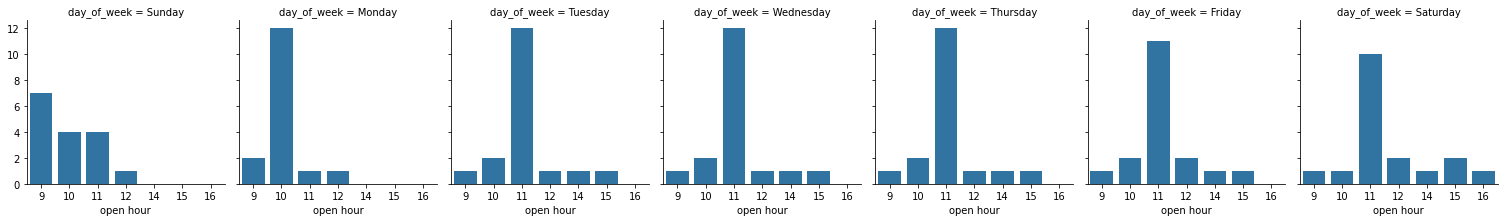

In [313]:
x = output.groupby(["day_of_week", 'open'], as_index=False)['name'].count()

g = sns.FacetGrid(
    x, col="day_of_week", height=3, aspect=1,
    col_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)
g.map_dataframe(sns.barplot, x="open", y="name")
g.set_axis_labels("open hour")

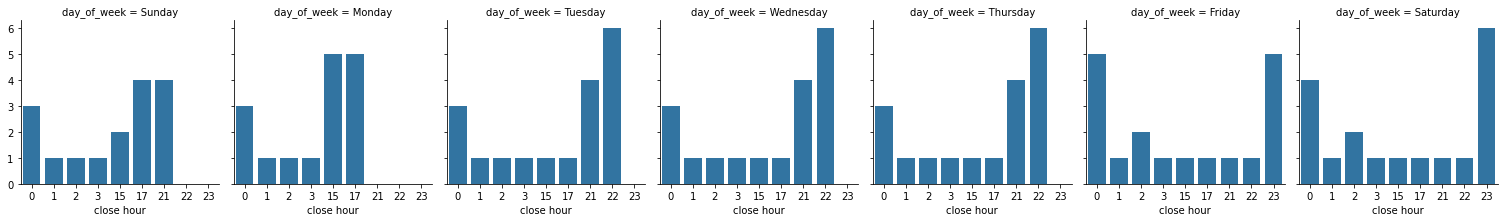

In [311]:
x = output.groupby(["day_of_week", 'close'], as_index=False)['name'].count()

g = sns.FacetGrid(
    x, col="day_of_week", height=3, aspect=1,
    col_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)
g.map_dataframe(sns.barplot, x="close", y="name")
g.set_axis_labels("close hour")

In [334]:
year = 2019
state = 'BC'
stars = 3 
category = 'pizza'

q1_fn(year, state, stars, category, 500).query("city == 'New Westminster'")

,business_id,name,state,city,stars,categories,checkin
9,5PbImb6dANokzsnklKwO9g,Pizza Garden New Westminster,BC,New Westminster,4.0,"Pizza, Restaurants",33
65,w-VJz3Z5bABl9P-0HAbygg,Pizzeria Ludica,BC,New Westminster,3.5,"Restaurants, Tabletop Games, Shopping, Italian...",10
150,AQDp8FVqa4Fp9wXK6l5H1A,Pizza Pizza,BC,New Westminster,3.0,"Restaurants, Pizza, Gluten-Free",3
189,3Vz24ABs_FlO6et9VXVgOw,Papa Dave's Pizza,BC,New Westminster,3.0,"Restaurants, Local Flavor, Pizza, Food",2
231,WNB22S5RXuA9-No5ZcSTAw,Gino's Restaurant,BC,New Westminster,3.5,"Greek, Seafood, Italian, Restaurants, Pizza",1
248,GFPDDlWYNFqT9gycvzM5_w,Papa John's Pizza,BC,New Westminster,3.0,"Pizza, Restaurants",1
259,FSW1n1qy2XNcKAWET7oejw,Kamini's Corner Cafe,BC,New Westminster,4.5,"Desserts, Event Planning & Services, Pizza, Br...",0
291,w9M1XgNkrRATfyfBhx_Xbg,Le Pizzo Bella,BC,New Westminster,4.0,"Restaurants, Italian, Pizza",0
307,W5ePvAu3X3QZiVyFZ1rDFw,Royal Crown Pizza,BC,New Westminster,4.0,"Restaurants, Pizza",0
348,_ljezoZ3vmsUmOYwZQuTXA,Queensboro Pizza,BC,New Westminster,3.5,"Pizza, Restaurants",0
